In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [501]:
# read excel data 
def read_excel_data(excel_file):
    df = pd.read_csv(excel_file)
    return df
df = read_excel_data('Dataset-vf.csv')

In [502]:
df.head()

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,X11,X12,X15,X13,X14,Y
0,43,59.0,11,120,150,2709,2114,228,217,120,0.66,269,R1,FC11,CA49,BMW
1,0,54.0,7,0,693,2802,162,224,225,136,0.35,195,NaN,FC11,CA50,BMW
2,0,28.0,12,0,1260,2325,162,215,213,133,0.89,750,NaN,FC14,CA26,Mercedes
3,16,112.0,8,272,3649,2837,6221,235,231,128,0.27,-155,NaN,FC11,CA32,Ford
4,10,59.0,7,134,900,2509,5184,226,226,134,0.93,88,NaN,FC11,CA38,BMW


In [503]:
#report numerical data
display(df.describe(include=[np.number]))

#check for null values
display(df.isnull().sum())


,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,X11,X12
count,6124.000000,5520.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000
mean,47.550621,151.293659,16.794579,192.488080,1541.308459,2645.712933,1442.194154,216.777106,218.770411,129.345852,0.493588,6.209993
std,57.465790,103.437461,8.995704,179.689943,1296.494523,393.799727,1123.945559,30.475508,23.550070,48.693500,0.290903,573.410551
min,-134.000000,0.000000,0.000000,0.000000,0.000000,1903.000000,30.000000,59.000000,99.000000,0.000000,0.000000,-1000.000000
25%,2.000000,71.000000,10.000000,42.000000,636.000000,2287.000000,663.000000,202.000000,207.000000,97.000000,0.240000,-492.250000
50%,27.000000,122.000000,15.000000,150.000000,1158.000000,2699.000000,1189.000000,224.000000,223.000000,134.000000,0.490000,21.000000
75%,77.000000,230.250000,23.000000,295.000000,2010.500000,2939.250000,1879.000000,239.000000,236.000000,163.000000,0.750000,495.000000
max,334.000000,359.000000,49.000000,1129.000000,6890.000000,3675.000000,6853.000000,254.000000,254.000000,248.000000,1.000000,1000.000000


X5        0
X2      604
X3        0
X4        0
X6        0
X1        0
X10       0
X7        0
X8        0
X9        0
X11       0
X12       0
X15    5523
X13       0
X14       0
Y         0
dtype: int64

In [504]:
print(df['X15'].value_counts())
print(df.shape)

X15
R3    229
R2    190
R1    181
R       1
Name: count, dtype: int64
(6124, 16)


## Dealing with Null Values

In [505]:
#replace null values with mean
df['X2'].fillna(df['X2'].mean(), inplace=True)
#delete column with null values
df.dropna(axis=1, inplace=True)

In [506]:
df.isnull().sum()


X5     0
X2     0
X3     0
X4     0
X6     0
X1     0
X10    0
X7     0
X8     0
X9     0
X11    0
X12    0
X13    0
X14    0
Y      0
dtype: int64

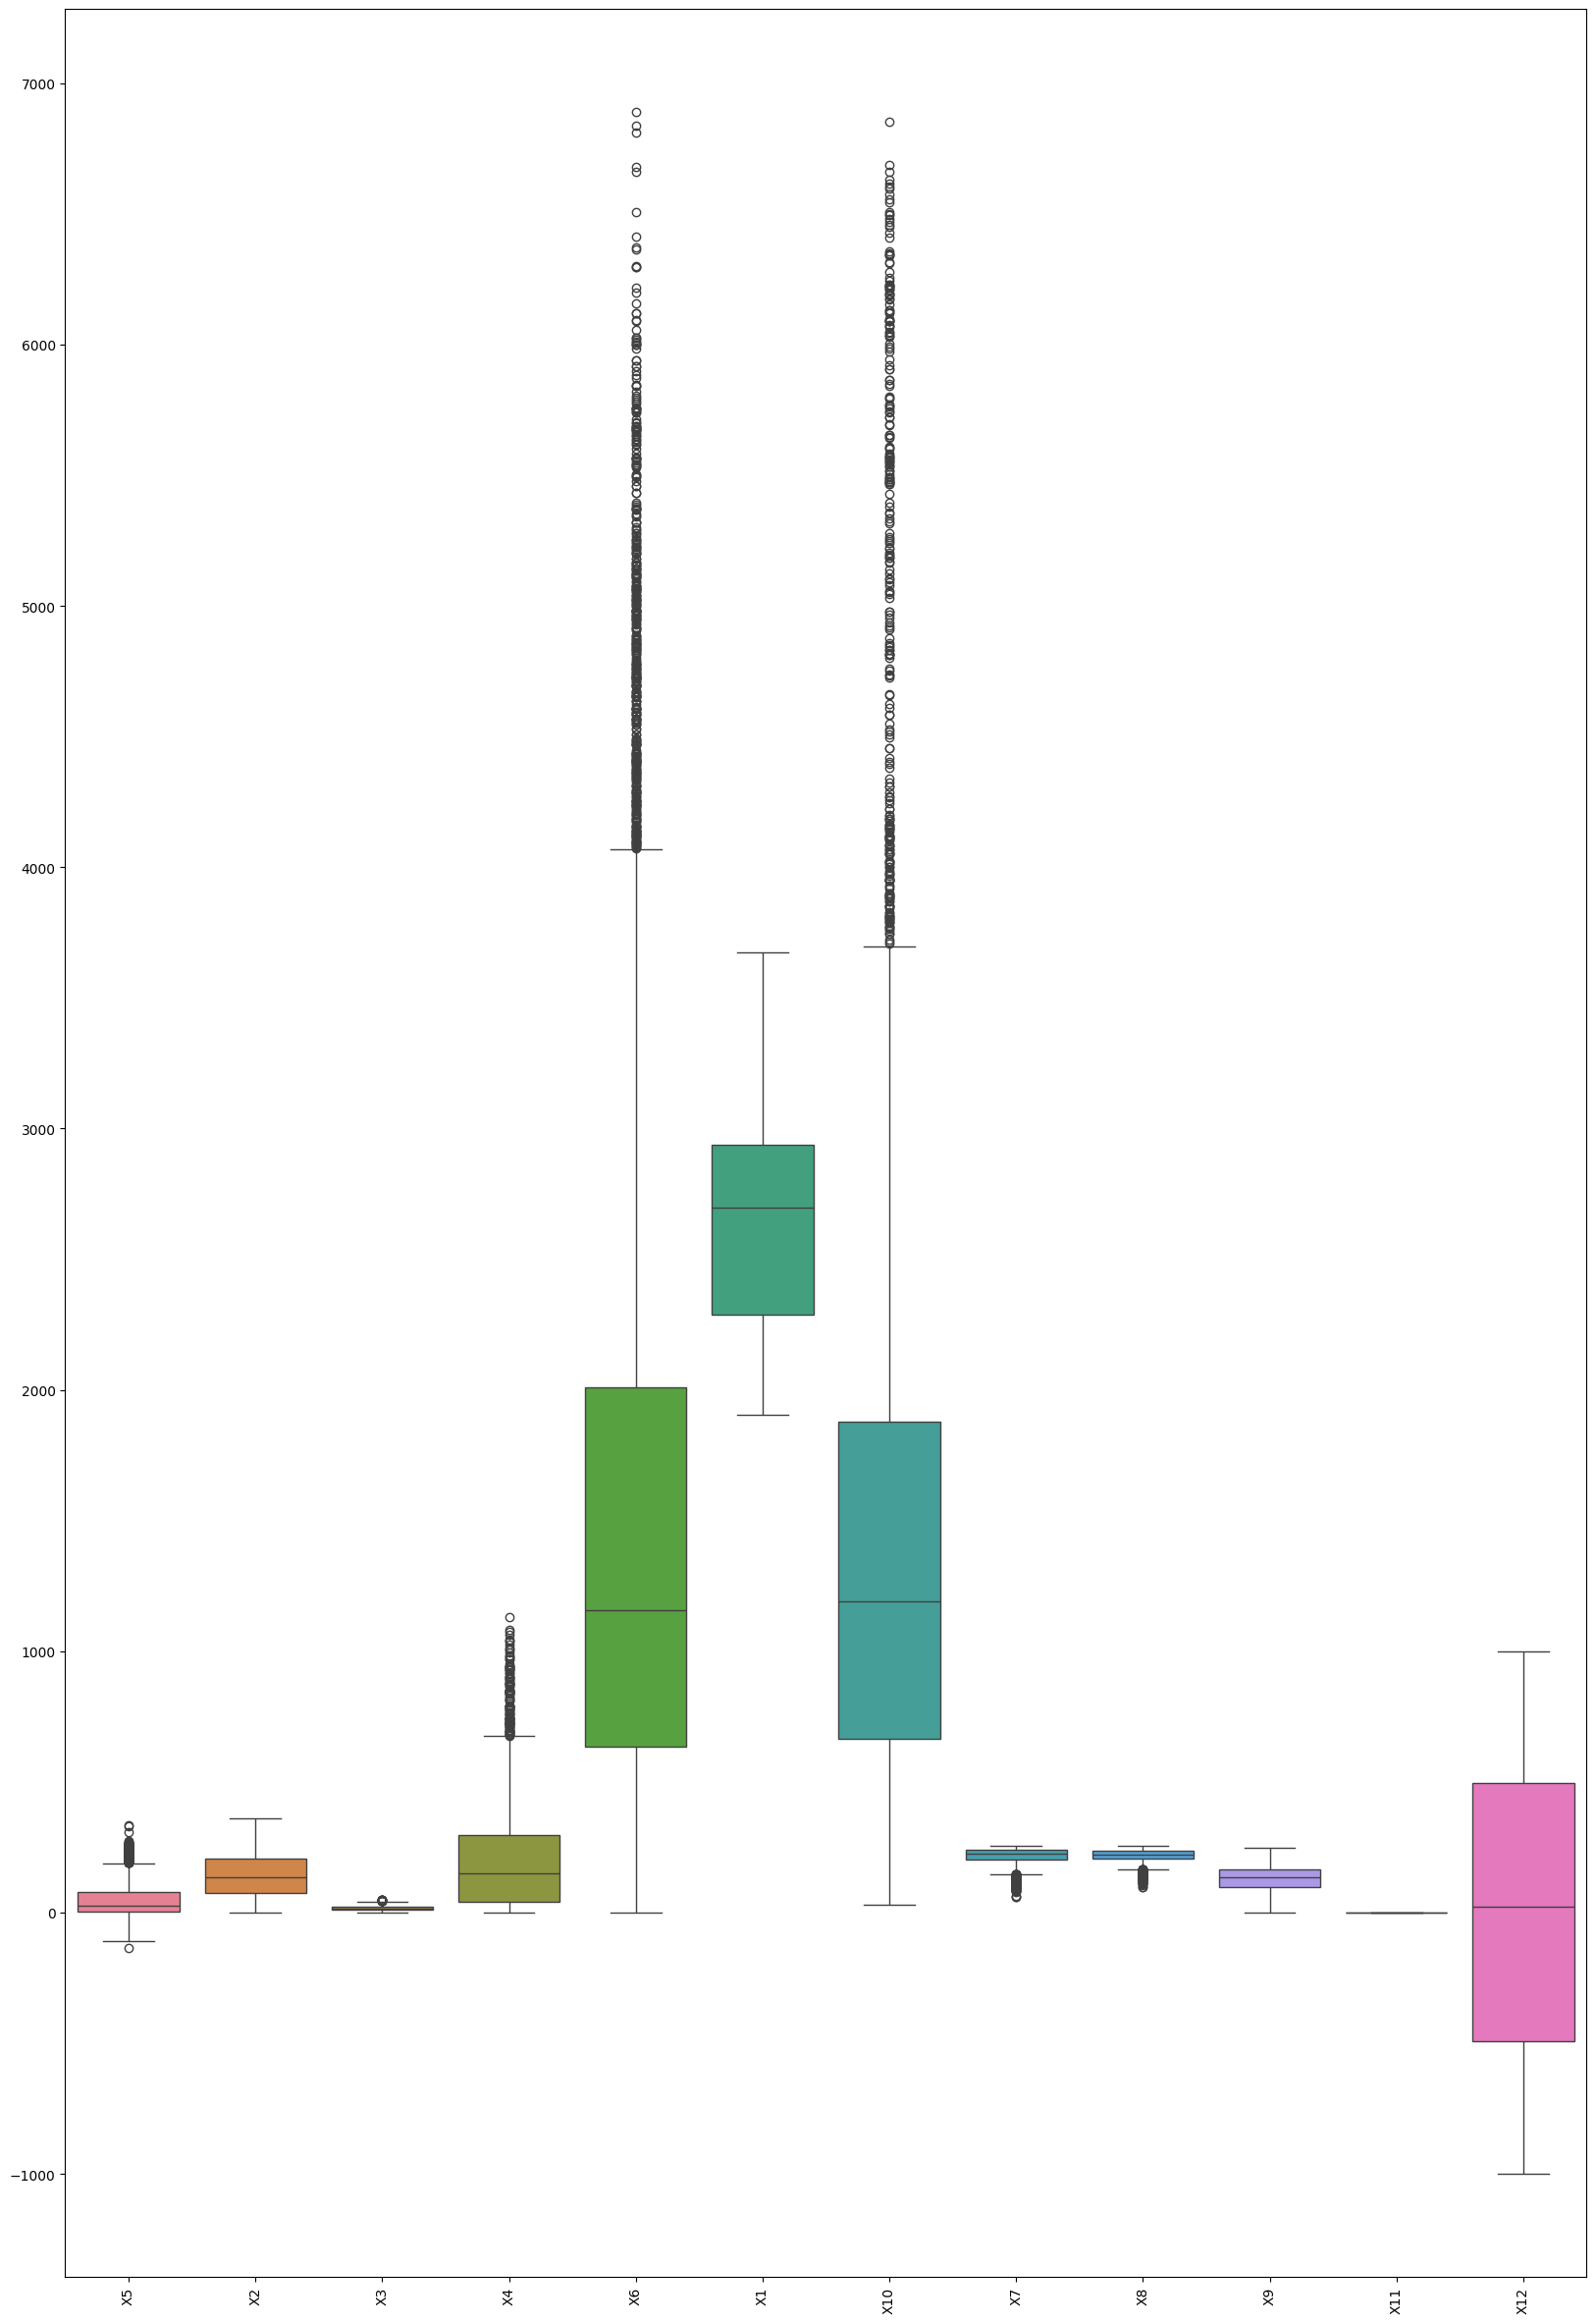

In [507]:
#check for outliers for all data which has X5	X2	X3	X4	X6	X1	X10	X7	X8	X9	X11	X12	X15	X13	X14	Y in multiple boxplots

# fig, axs = plt.subplots(6, 2, figsize=(40, 80))
# for i in range(6):
#     for j in range(2):
#         plt1 = sns.boxplot(df[df.columns[i+j]], ax = axs[i,j])
#         plt1.set(xlabel=df.columns[i+j])
#         plt1.set_title(df.columns[i+j], fontsize=50)


# plt.tight_layout()

#check for outliers for all data which has X5	X2	X3	X4	X6	X1	X10	X7	X8	X9	X11	X12	X15	X13	X14	Y in multiple boxplots
plt.figure(figsize=(20,30))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()





## Information of Categorical Data

In [508]:
#uniques of all columns
for i in ['X14', 'X13', 'Y']:
    print("Name:",i,"|Data", df[i].unique()," |Count",len(df[i].unique()))

Name: X14 |Data [' CA49' ' CA50' ' CA26' ' CA32' ' CA38' ' CA42' ' CA37' ' CA23' ' CA24'
 ' CA21' ' CA43' ' CA22' ' CA36' ' CA33' ' CA44' ' CA59' ' CA30' ' CA51'
 ' CA52' ' CA31' ' CA40' ' CA58' ' CA25' ' CA39' ' CA53' ' CA60' ' CA46'
 ' CA34' ' CA41' ' CA48' ' CA54' ' CA55']  |Count 32
Name: X13 |Data [' FC11' ' FC14' ' FC13' ' FC12']  |Count 4
Name: Y |Data ['BMW' 'Mercedes' 'Ford' 'Toyota' 'Honda' 'GMC']  |Count 6


In [509]:
# print number of unique value of Y and there number of values
print(df['Y'].value_counts())

Y
Mercedes    1620
BMW         1571
Toyota      1275
Honda       1250
GMC          308
Ford         100
Name: count, dtype: int64


In [510]:
# !pip install category_encoders

In [511]:
# !pip install imblearn

## Binary encoding of categorical data

In [514]:
# Binary encoding for X14 , X13, Y
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['X14', 'X13'])
df = encoder.fit_transform(df)

ValueError: X does not contain the columns listed in cols

In [515]:
df.columns

Index(['X5', 'X2', 'X3', 'X4', 'X6', 'X1', 'X10', 'X7', 'X8', 'X9', 'X11',
       'X12', 'X13_0', 'X13_1', 'X13_2', 'X14_0', 'X14_1', 'X14_2', 'X14_3',
       'X14_4', 'X14_5', 'Y'],
      dtype='object')

## Splitting the data into training and testing data

In [516]:
#split data into train and test
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4899, 21) (1225, 21) (4899,) (1225,)


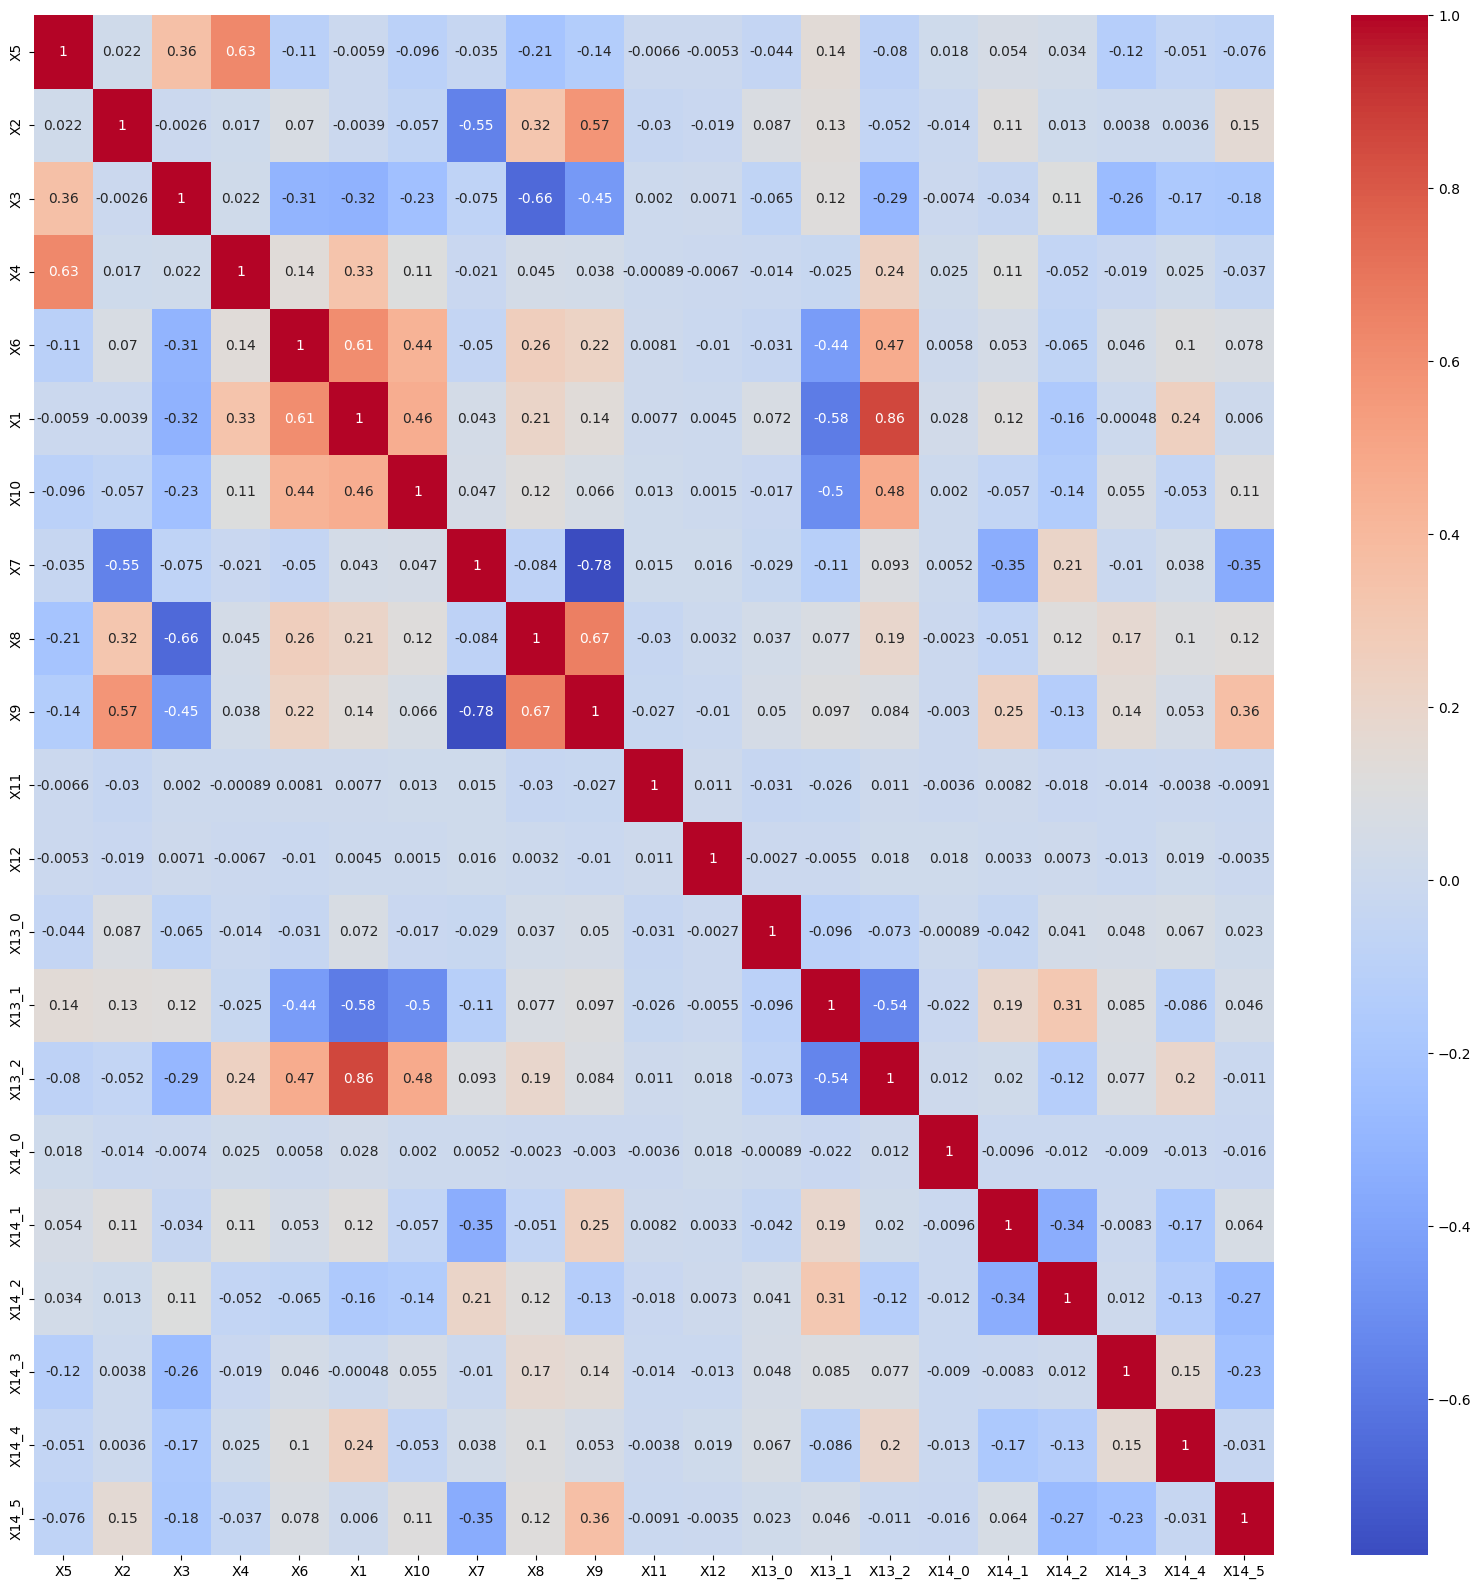

    Feature 1 Feature 2  Correlation
102        X1     X14_3    -0.000475
63         X4       X11    -0.000886
176     X13_0     X14_0    -0.000892
109       X10       X12     0.001517
113       X10     X14_0     0.002013
..        ...       ...          ...
2          X5        X4     0.627440
44         X3        X8    -0.659621
132        X8        X9     0.665765
120        X7        X9    -0.780204
98         X1     X13_2     0.858707

[210 rows x 3 columns]


In [517]:
# display correlation matrix    

corr = X_train.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Take the upper triangle of the correlation matrix, excluding the diagonal
upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_))
correlation_pairs = upper_triangle.stack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
sorted_pairs = correlation_pairs.reindex(correlation_pairs.Correlation.abs().sort_values(ascending=True).index)
print(sorted_pairs)


## Dealing with Inbalance Data

Counter({'Mercedes': 1303, 'BMW': 1268, 'Toyota': 1032, 'Honda': 988, 'GMC': 227, 'Ford': 81})


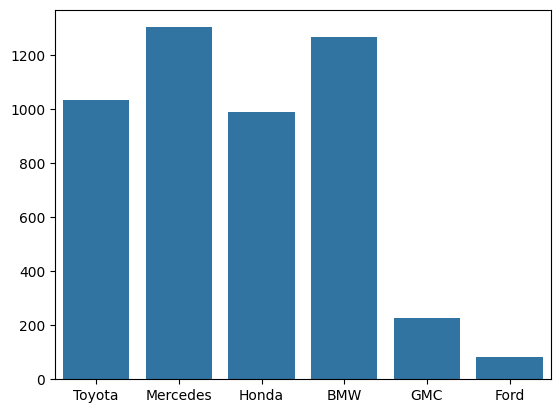

In [518]:
#SMOTE, oversampling, undersampling, SMOTEENN, SMOTETomek, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, SMOTENC
from imblearn.over_sampling import SMOTE
from collections import Counter


# summarize class distribution
counter = Counter(y_train)
print(counter)

#plot barplot of y_train
sns.barplot(x=counter.keys(), y=counter.values())
plt.show()



Counter({'Toyota': 1303, 'Mercedes': 1303, 'Honda': 1303, 'BMW': 1303, 'GMC': 1303, 'Ford': 1303})


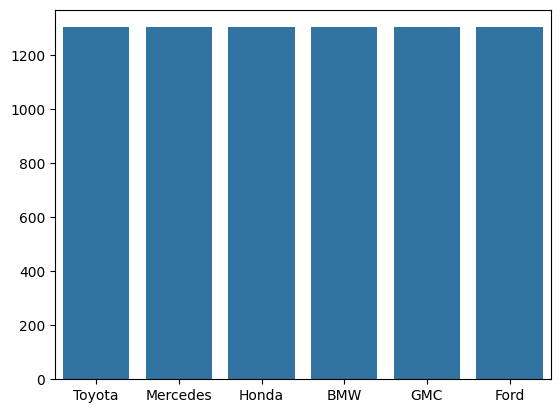

In [519]:
# transform the dataset
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)


# summarize the new class distribution
counter = Counter(y_train)
print(counter)
#plot barplot of y_train
sns.barplot(x=counter.keys(), y=counter.values())
plt.show()


## Binary encoding of y

In [520]:
# Binary encoding for X14 , X13, Y
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
# encoder = ce.BinaryEncoder()
print(X_train.shape, y_train.shape)
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)
print(y_train_encoded.shape, y_test_encoded.shape)

(7818, 21) (7818,)
(7818, 6) (1225, 6)


In [521]:
# y_train.columns

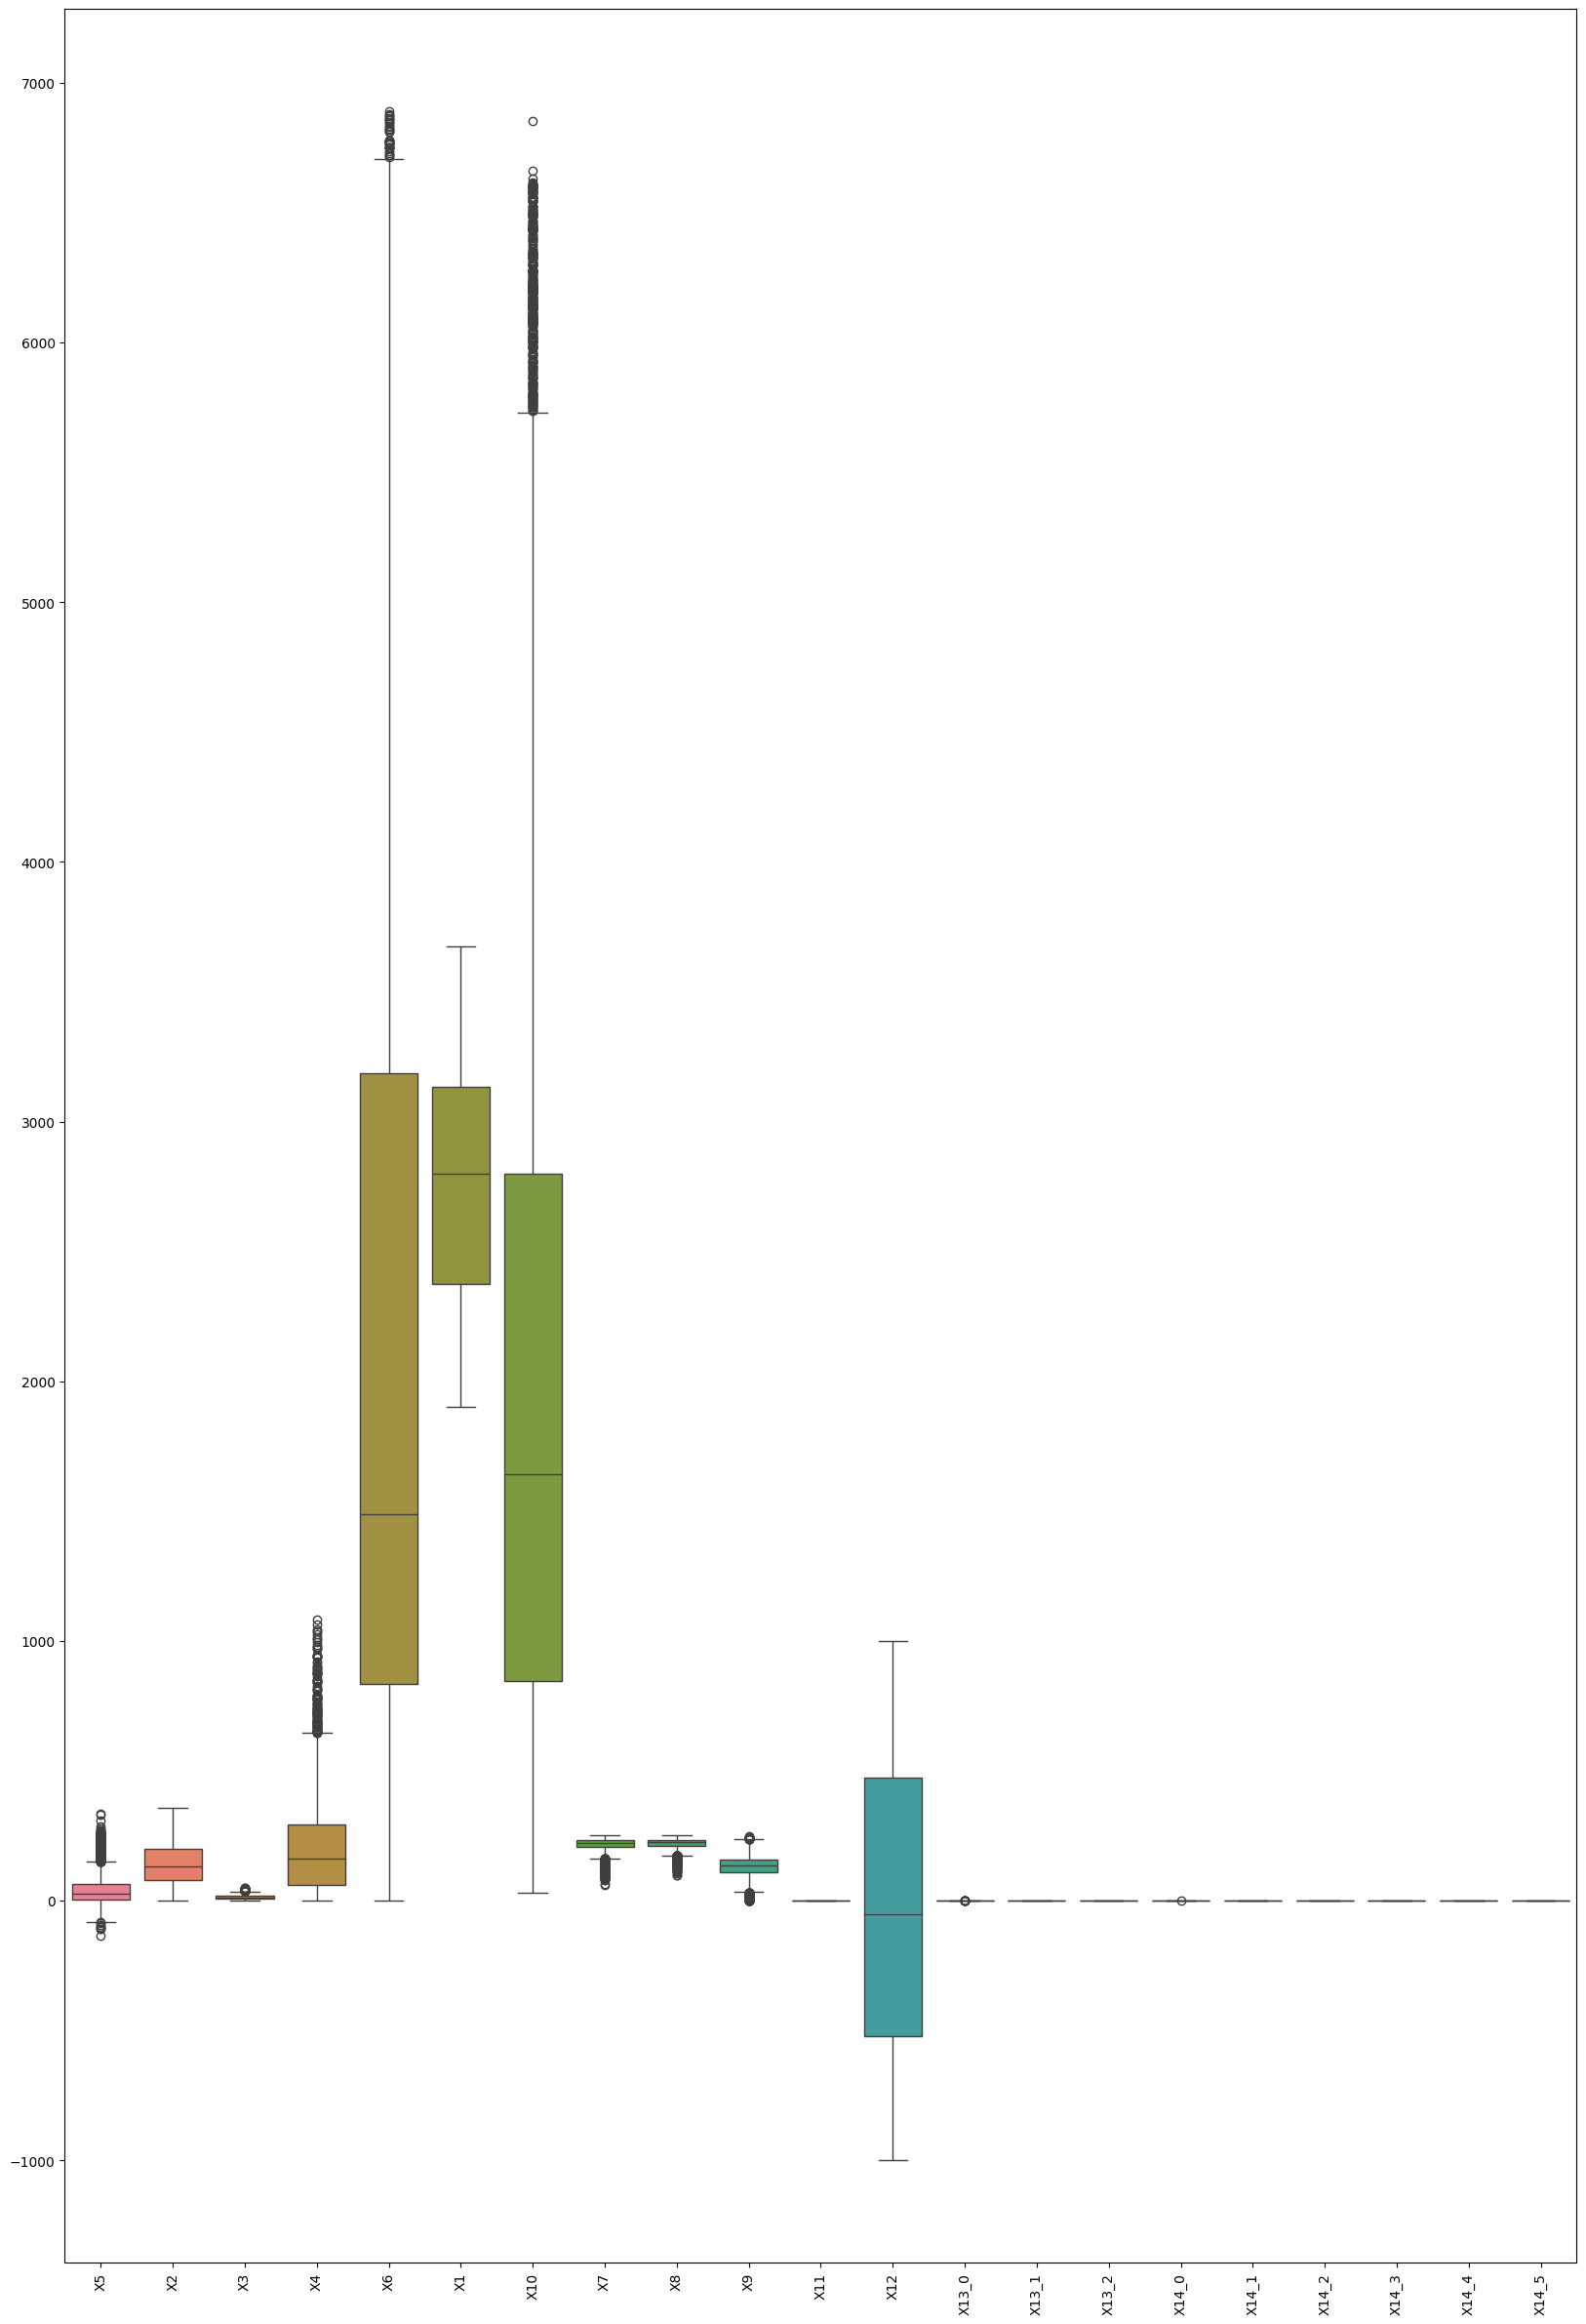

In [522]:
plt.figure(figsize=(20,30))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.show()

## Data Normalization

In [523]:
# Data Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, X_test.shape, y_train_encoded.shape, y_test_encoded.shape)


(7818, 21) (1225, 21) (7818,) (1225,)
(7818, 21) (1225, 21) (7818, 6) (1225, 6)


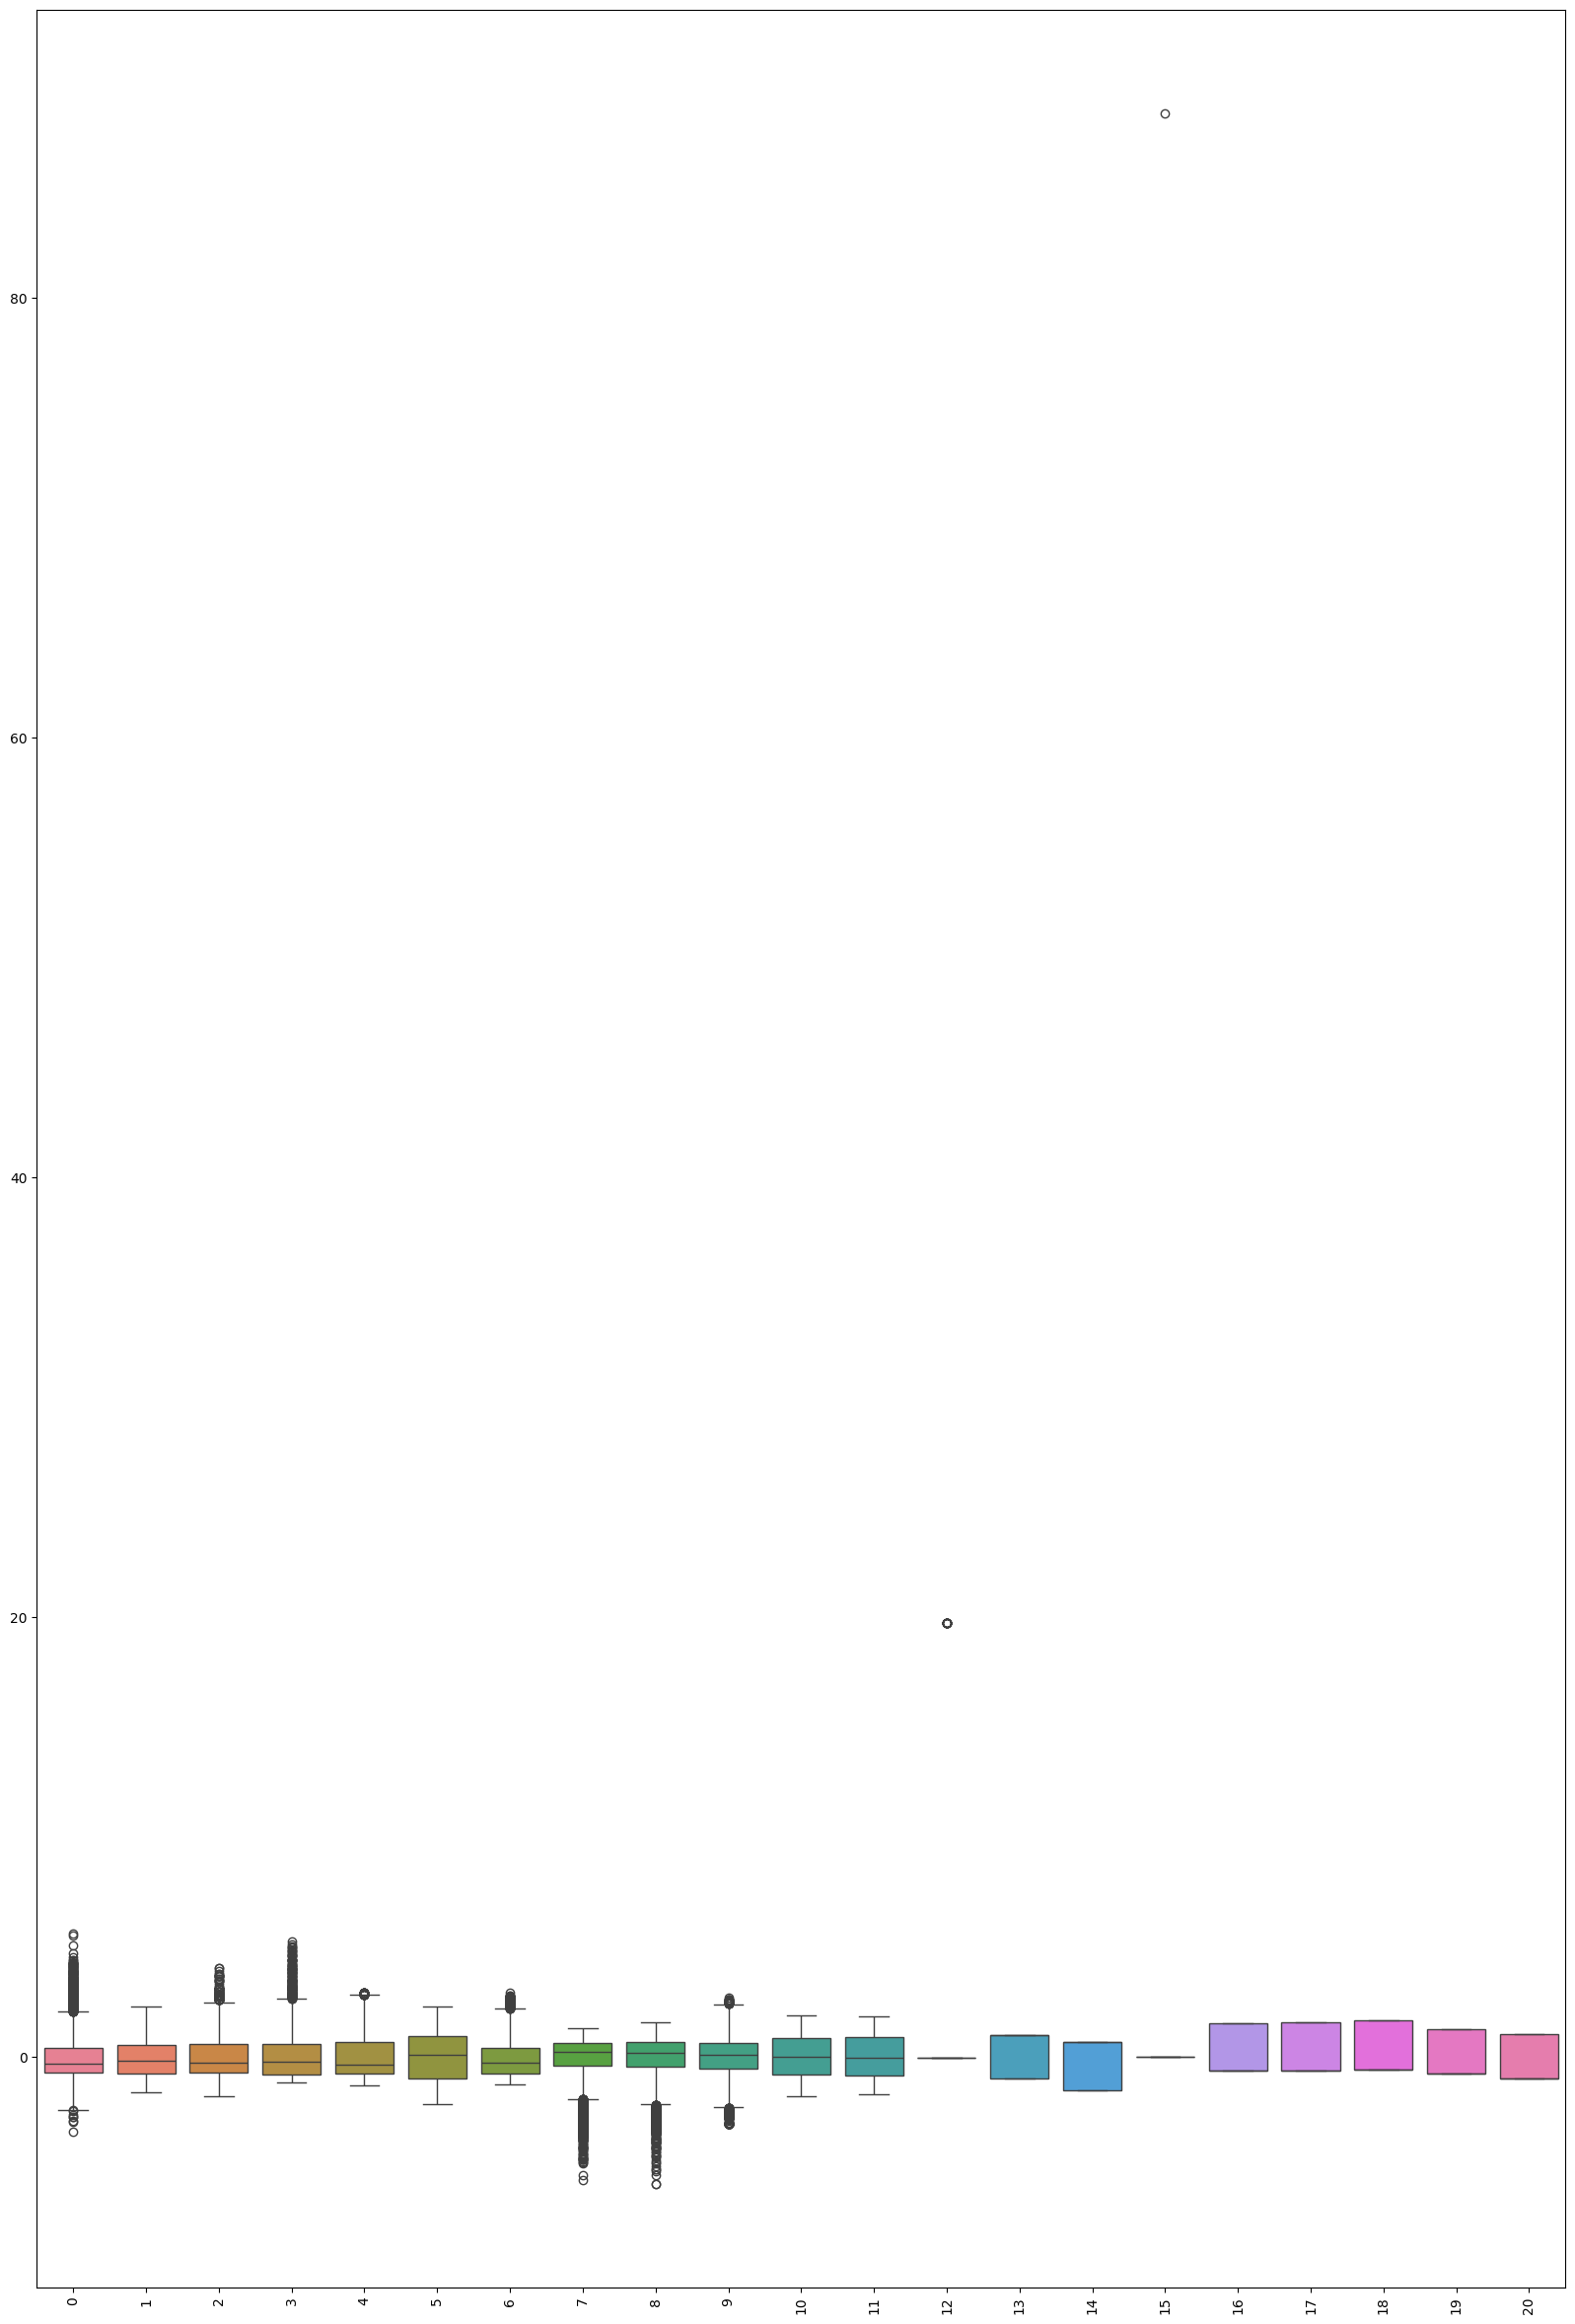

In [524]:
plt.figure(figsize=(20,30))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.show()

In [525]:
# count number of outleirs in each column
#convert numpy array to dataframe
X_train = pd.DataFrame(X_train)
for i in X_train:

    Q1 = X_train[i].quantile(0.25)
    Q3 = X_train[i].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = X_train[(X_train[i] < (Q1 - 1.5 * IQR)) | (X_train[i] > (Q3 + 1.5 * IQR))]

    # Count number of outliers
    number_of_outliers = len(outliers)

    print(f"Number of outliers in {i}: {number_of_outliers}")

Number of outliers in 0: 428
Number of outliers in 1: 0
Number of outliers in 2: 114
Number of outliers in 3: 133
Number of outliers in 4: 37
Number of outliers in 5: 0
Number of outliers in 6: 417
Number of outliers in 7: 460
Number of outliers in 8: 315
Number of outliers in 9: 198
Number of outliers in 10: 0
Number of outliers in 11: 0
Number of outliers in 12: 20
Number of outliers in 13: 0
Number of outliers in 14: 0
Number of outliers in 15: 1
Number of outliers in 16: 0
Number of outliers in 17: 0
Number of outliers in 18: 0
Number of outliers in 19: 0
Number of outliers in 20: 0


In [526]:
display(y_train_encoded.head())

,BMW,Ford,GMC,Honda,Mercedes,Toyota
0,False,False,False,False,False,True
1,False,False,False,False,True,False
2,False,False,False,True,False,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False


In [538]:
def models(parameters,model,X_train,y_train_categorical,X_test,y_test_categorical):
    #grid search for the model
    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(estimator=model,
                            param_grid=parameters,
                            scoring='accuracy',
                            cv=10,
                            n_jobs=-1)
    grid_search.fit(X_train, y_train_categorical)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    print("Best Accuracy: ",best_accuracy)
    print("Parameters: ",best_parameters)
    best_model = grid_search.best_estimator_
    

    #predicting the test data
    y_pred = best_model.predict(X_test)

    #confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test_categorical, y_pred)
    print(cm)

    #accuracy score
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test_categorical, y_pred)
    print("Test Accuracy",accuracy)

    #classification report
    from sklearn.metrics import classification_report
    print(classification_report(y_test_categorical, y_pred))


    #cross validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator=best_model, X=X_train, y=y_train_categorical, cv=10)
    print("Mean Accuracies: ",accuracies.mean())
    print("std Accuracies: ",accuracies.std())

    return best_model


In [540]:
y_train_categorical = np.argmax(y_train_encoded.values, axis=1)
y_test_categorical = np.argmax(y_test_encoded.values, axis=1)

In [541]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_regresstion = models(parameters={'C': [0.1, 0.5, 1, 5, 10, 50, 100]},model=LogisticRegression(),X_train=X_train,y_train_categorical=y_train_categorical,X_test=X_test,y_test_categorical=y_test_categorical)


Best Accuracy:  0.8489422702221232
Parameters:  {'C': 0.5}
[[270  14   0   9   0  10]
 [  0  18   0   0   0   1]
 [  0   0  57   0   0  24]
 [ 15   0   0 185  62   0]
 [  0   0   0  31 286   0]
 [ 19  17  36   0   0 171]]
Test Accuracy 0.8057142857142857
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       303
           1       0.37      0.95      0.53        19
           2       0.61      0.70      0.66        81
           3       0.82      0.71      0.76       262
           4       0.82      0.90      0.86       317
           5       0.83      0.70      0.76       243

    accuracy                           0.81      1225
   macro avg       0.72      0.81      0.74      1225
weighted avg       0.82      0.81      0.81      1225

Mean Accuracies:  0.8489422702221232
std Accuracies:  0.014230860560030494


In [542]:
#SVM
from sklearn.svm import SVC
svm = models(parameters={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear','rbf']},model=SVC(),X_train=X_train,y_train_categorical=y_train_categorical,X_test=X_test,y_test_categorical=y_test_categorical)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = models(parameters={'n_neighbors': [5, 10, 15, 20, 25, 30]},model=KNeighborsClassifier(),X_train=X_train,y_train_categorical=y_train_categorical,X_test=X_test,y_test_categorical=y_test_categorical)

In [ ]:
#Desicion Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = models(parameters={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20, 25, 30]},model=DecisionTreeClassifier(),X_train=X_train,y_train_categorical=y_train_categorical,X_test=X_test,y_test_categorical=y_test_categorical)

In [ ]:
#!pip install lazypredict



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for click from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     --------------------------------- ---- 51.2/57.6 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 503.9 kB/s eta 0:00:00
  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb531659d48d3cb/lightgbm-4.1.0-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/

In [ ]:
from lazypredict.Supervised import LazyClassifier


clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train_categorical, y_test_categorical)
models

 97%|█████████▋| 28/29 [00:50<00:01,  1.37s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2555
[LightGBM] [Info] Number of data points in the train set: 7818, number of used features: 20
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759


100%|██████████| 29/29 [00:53<00:00,  1.84s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.94,0.92,None,0.94,5.28
XGBClassifier,0.94,0.92,None,0.94,2.01
LGBMClassifier,0.94,0.92,None,0.94,2.50
BaggingClassifier,0.92,0.91,None,0.92,2.23
ExtraTreesClassifier,0.94,0.91,None,0.94,1.84
DecisionTreeClassifier,0.89,0.87,None,0.89,0.32
SVC,0.89,0.86,None,0.89,2.93
KNeighborsClassifier,0.84,0.84,None,0.84,0.30
LabelPropagation,0.86,0.83,None,0.86,9.17


## After Deletting Outliers 

In [ ]:

#delete outliers
X_train_no = X_train[~((X_train < (Q1 - 1.5 * IQR)) |(X_train > (Q3 + 1.5 * IQR))).any(axis=1)]
y_train_no = y_train_categorical[~((X_train < (Q1 - 1.5 * IQR)) |(X_train > (Q3 + 1.5 * IQR))).any(axis=1)]

 97%|█████████▋| 28/29 [00:39<00:01,  1.03s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2537
[LightGBM] [Info] Number of data points in the train set: 7696, number of used features: 19
[LightGBM] [Info] Start training from score -1.794622
[LightGBM] [Info] Start training from score -1.776031
[LightGBM] [Info] Start training from score -1.779876
[LightGBM] [Info] Start training from score -1.807211
[LightGBM] [Info] Start training from score -1.779106
[LightGBM] [Info] Start training from score -1.814362
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:40<00:00,  1.39s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.95,0.93,None,0.95,1.19
RandomForestClassifier,0.94,0.92,None,0.94,3.98
ExtraTreesClassifier,0.95,0.92,None,0.95,1.62
XGBClassifier,0.94,0.92,None,0.94,1.34
BaggingClassifier,0.92,0.91,None,0.92,1.92
DecisionTreeClassifier,0.90,0.89,None,0.90,0.26
SVC,0.89,0.86,None,0.89,2.14
ExtraTreeClassifier,0.84,0.84,None,0.84,0.04
KNeighborsClassifier,0.84,0.83,None,0.83,0.21


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_regresstion = models(parameters={'C': [0.1, 0.5, 1, 5, 10, 50, 100]},model=LogisticRegression(),X_train=X_train_no,y_train_categorical=y_train_no,X_test=X_test,y_test_categorical=y_test_categorical)

(1225,) (1225,)
[[286   7   0   3   0   7]
 [  1  15   0   0   0   3]
 [  0   0  64   0   0  17]
 [ 13   0   0 210  39   0]
 [  0   0   0  13 304   0]
 [ 10  11  11   0   0 211]]
0.889795918367347
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       303
           1       0.45      0.79      0.58        19
           2       0.85      0.79      0.82        81
           3       0.93      0.80      0.86       262
           4       0.89      0.96      0.92       317
           5       0.89      0.87      0.88       243

    accuracy                           0.89      1225
   macro avg       0.82      0.86      0.83      1225
weighted avg       0.90      0.89      0.89      1225

0.9151974156026604
0.012884492701116287
0.9270939283690985
{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}


In [ ]:
#SVM
from sklearn.svm import SVC
svm = models(parameters={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear','rbf']},model=SVC(),X_train=X_train_no,y_train_categorical=y_train_no,X_test=X_test,y_test_categorical=y_test_categorical)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = models(parameters={'n_neighbors': [5, 10, 15, 20, 25, 30]},model=KNeighborsClassifier(),X_train=X_train_no,y_train_categorical=y_train_no,X_test=X_test,y_test_categorical=y_test_categorical)

Best Accuracy:  0.9054785817906742
Parameters:  {'metric': 'minkowski', 'n_neighbors': 3, 'p': 1}
[[290   2   0   1   0  10]
 [  1  17   0   0   0   1]
 [  6   0  67   0   0   8]
 [ 12   0   0 211  39   0]
 [  0   0   0  13 304   0]
 [ 27  10  19   2   0 185]]
Test Accuracy 0.876734693877551
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       303
           1       0.59      0.89      0.71        19
           2       0.78      0.83      0.80        81
           3       0.93      0.81      0.86       262
           4       0.89      0.96      0.92       317
           5       0.91      0.76      0.83       243

    accuracy                           0.88      1225
   macro avg       0.83      0.87      0.84      1225
weighted avg       0.88      0.88      0.88      1225

Mean Accuracies:  0.8751600512163893
std Accuracies:  0.01627041044330962


In [ ]:
#Desicion Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = models(parameters={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20, 25, 30]},model=DecisionTreeClassifier(),X_train=X_train_no,y_train_categorical=y_train_no,X_test=X_test,y_test_categorical=y_test_categorical)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_no, X_test, y_train_no, y_test_categorical)
models